# Theoretical Phase Changes in 1 Neuron Models

In [110]:
import torch
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import TwoSlopeNorm
import warnings
from torch import nn

In [111]:
def l1(s):
  return (s/3) - (s*s)/4

def l2(s, r):
  return r * ((s/3) - (s*s)/4)

def l3(s, r):
  return ((1 + r) * s*s) / 6

# Create a tensor
rv = torch.zeros(1000, 100)

# Create grids
i, j = torch.meshgrid(torch.arange(1000), torch.arange(100), indexing='ij')

# Calculate s and r for the entire grid
s = (i) / 1000
r = j / 10

# Apply the functions
l1_result = l1(s)
l2_result = l2(s, r)
l3_result = l3(s, r)

# Apply the custom min logic
condition1 = torch.le(l1_result, l2_result) & torch.le(l1_result, l3_result)
condition2 = torch.le(l2_result, l1_result) & torch.le(l2_result, l3_result)

rv[condition1] = -1
rv[condition2] = 1
rv[~condition1 & ~condition2] = 0

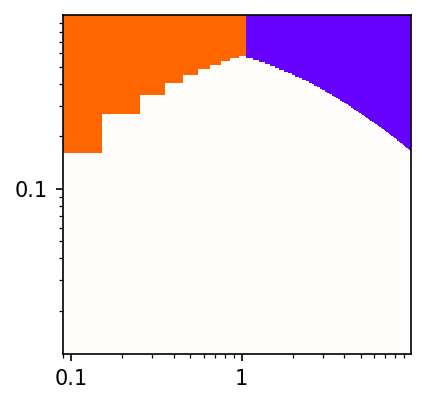

In [112]:
warnings.filterwarnings('ignore')

plt.figure(figsize=(3, 3), dpi=150)

# Set the x-axis to a logarithmic scale
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')

colors = [(.4, 0, 1), (1, 1, 1), (1, .4, 0)]  # Purple -> White -> Orange
n_bins = 100 
cm = LinearSegmentedColormap.from_list("", colors, N=n_bins)

plt.imshow(rv, cmap=cm, aspect='auto')

# Get current y-ticks
current_yticks = plt.gca().get_yticks()

plt.gca().invert_yaxis()
plt.gca().set_xticklabels(['', '', '0.1', '1', '10', '', ''])
plt.gca().set_yticklabels(['', '', '0.1', '0.1', ''])

plt.show()